### The Gambling Game

Consider 2 coin machines. Each machine dispenses a coin with an unkonwn probability. A player chooses between the 2 machine for the one that they think will give a coin. They get 135 chances/trials.  

If t is one such trial, then the following is true for t:

1. the probabilities of reward of the 2 machines add up to 1. 
2. the probability of reward of a machine is independent of that in any other trial. 
3. the player's choices do not influence the probabilities of reward in later trials. 

At https://hannekedenouden.ruhosting.nl/RLtutorial/Instructions.html, there is a set of data collected from 'students of the 2015 Computational Approaches to Cognitive Neuroscience Summerschool at the Donders Institute for Brain, Cognition and Behaviour, Radboud University Nijmegen.'. The data provided consists of some special datasets, each of which contains behavioral data of a student player. We have randomly selected 1 such dataset and loaded it here in the following code. 

In [1]:
import scipy.io as sio

In [2]:
# data from TaskReversalLearn\data\[some file].mat
datapath = '../../Documents/MATLAB/Modsoflearning/RLtutorial_codeNdata/taskReversalLearn/data/tutorialRevLearn_low_s014_data.mat'
data = sio.loadmat(datapath, squeeze_me=True, struct_as_record=False)

This dataset consists(not exclusively) of the following: 
1. choices made by the student player, which is a sequence of 1's and 2's of length 135, 1 and 2 referring to the 2 machines. To make things easier later, for i = 1, 2, we call machine i machine i-1 instead. 
2. feedback(call array r) from the machines, which is a 135x2 array where each column corresponds to 1 machine so that for i = 0, 1 and j = 0, ... , 134, r[i, j] = 0 if machine j does not dispense a coin at trial i, and feedback[i, j] = 1 if otherwise. 
3. feedback probabilities(call array feedbackprob) from a machine, which is a 135x1 array so that for j = 0, ..., 134, feedbackprob[j] = the probability that a machine dispenses a coin at trial j

In [7]:
# choices = data.choice - 1 (black dots) 
print(data.keys())
choices = data['data'].choice
modifiedchoices = choices - 1
modifiedchoices
r = data['data'].prep.feedback
r

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1,

In [11]:
# probability of reward of one of the machines 
probblue = data['data'].prep.feedbackprob
probblue

array([ 0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.7,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.7,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3])

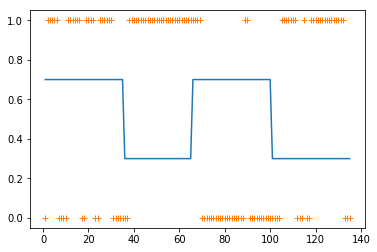

In [32]:
# plot choices and feedback probabilities against trials
trials = list(range(1, len(modifiedchoices)+1, 1))
import matplotlib.pyplot as plt
plt.plot(trials, probblue, '-', trials, modifiedchoices, '+')
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


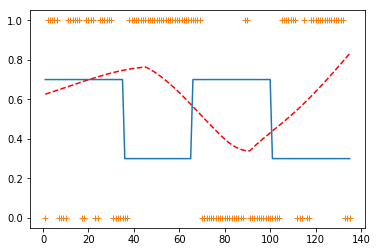

In [10]:
# add smoothed choice
# there are many ways of doing this. Here we use lowess
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
smoothedchoice = lowess(modifiedchoices, trials)

plt.plot(trials, smoothedchoice[:, 1], 'r--', trials, probblue, '-', trials, modifiedchoices, '+')
plt.show()

In [38]:
# Want to make sure that exactly 1 machine gives a coin at every trial 
test = np.sum(r, axis = 1)
test
# we can see how many 1's there are in this case because the dataset is small enough 
# in practice, datasets can be very large, so to confirm that test indeed is an array of sums, we do the following:
if np.sum(test).astype(int) == len(test):
    print(True)
else:
    print(False)

True


### Learning
We use two learning models in this notebook. 

### Reinforcement Learning
First, we use the Rescorla-Wagner Equation together with the Softmax Equation to simulate an individual player. 
<br>
Rough Learning Algorithm:
1. have stimulus value for each machine 
2. use Softmax to generate choice probabilities 
3. toss a biased coin to generate a choice from the choice probabilities 
4. get reward 
5. plug into Rescorla Wagner to get new stimuli values 
6. repeat

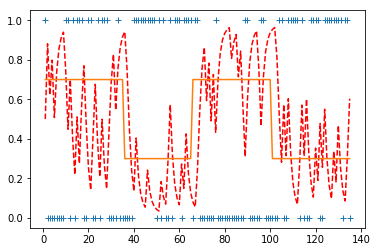

In [41]:
# Simulate individual behavior  

import numpy as np

# parameter values
alpha = 0.25
beta = 4

def Simulate(alpha, beta):
    # rewards
    r = data['data'].prep.feedback

# matrix of stimuli values 
    stim = np.zeros((135, 2), dtype = float)
# matrix of choice probabilities 
    cp = np.zeros((135, 2), dtype = float)
# matrix of choices 
    c = np.zeros(135, dtype=int)
# c[i] = choice at trial i + 1 

# set initial values 
    stim[0, :] = [0, 0]
# stim[i, :] = stimuli from trial i
    cp[0, :] = [1/2, 1/2] 
# cp[i, :] = probabilities of choosing each machine at trial i + 1
    loglik = 0
# log likelihood for data fitting 
    loglikopt = 0 
# log likelihood for optimal performance

    for i in range(0, 134): 
# generate random number between 0 and 1 
        h = np.random.random_sample(1)
        if h < cp[i, 0]: 
            c[i] = 0
        else: 
            c[i] = 1
        
# substitute into RW equation to get new stimulus for chosen machine 
# RW equation: 
        s = c[i]
        stim[i+1, s] = stim[i, s] + alpha*(r[i, s] - stim[i, s])
        stim[i+1, 1-s] = 1-stim[i+1, s]
    
# then substitute two stimuli into softmax equation to get choice probability for machine s 
# Softmax equation:
        cp[i+1, s] = (np.exp(beta*stim[i+1,s]))/(np.exp(beta*stim[i+1,0]) + np.exp(beta*stim[i+1,1]))
        cp[i+1, 1-s] = 1 - cp[i+1, s]
    
# compute log likelihoods for data fitting 
        if data['data'].choice[i] == 1:
            loglik = loglik + np.log(cp[i, 0])
        else:
            loglik = loglik + np.log(cp[i, 1])
            
# compute log likelihoods for optimal performance 
        if r[i, 1] == 1:
            loglikopt = loglikopt + np.log(cp[i, 1])
        else:
            loglikopt = loglikopt + np.log(cp[i, 0])

    return c, cp, loglik, loglikopt

c, cp, loglik, loglikopt = Simulate(alpha, beta)

# plot choices, choice probabilities and feedback probabilites against trial number
plt.plot(trials, c, '+', trials, cp[:, 0], 'r--', trials, probblue, '-')
plt.show()

#### Exploring alpha
We fix beta and see what varying alpha does to the model. 

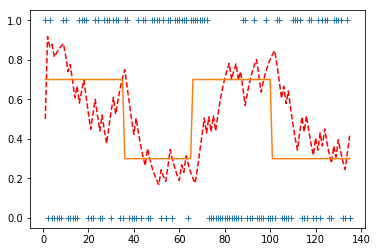

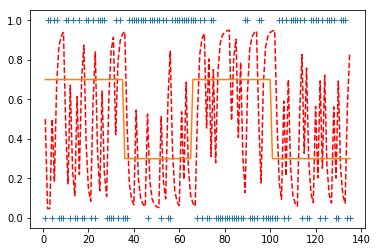

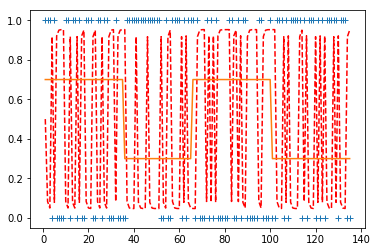

In [43]:
# Explore what changing alpha does to the behavior of the model 
# we run the above code for different values of alpha, for instance,
alpha = [0.1, 0.5, 0.9]
# beta is fixed 
beta = 3 

# run simulation for chosen values of alpha and beta
c0, cp0, loglik0, loglikopt0 = Simulate(alpha[0], beta)
c1, cp1, loglik1, loglikopt1 = Simulate(alpha[1], beta)
c2, cp2, loglik2, loglikopt2 = Simulate(alpha[2], beta)

# plot 
plt.plot(trials, c0, '+', trials, cp0[:, 0], 'r--', trials, probblue, '-')
plt.show()
plt.plot(trials, c1, '+', trials, cp1[:, 0], 'r--', trials, probblue, '-')
plt.show()
plt.plot(trials, c2, '+', trials, cp2[:, 0], 'r--', trials, probblue, '-')
plt.show()

As alpha increases, the difference in choice probabilities of trial i and trial i+1 increases for all i > 1. 

#### Exploring beta

If beta is negative, then for any given pair of stimuli V and 1-V (don't know why they have to be like this, tutorial says so, but check that they are always related like this in the code above), the smaller stimuli yields a higher choice probability, which is silly. 

So beta is a non-negative real number. 

If beta = 0, then choice probability = 0.5. 

If beta = infty, then (do not know if I can use the Taylor expansion of exp to estimate large beta values) 

We cannot try all possible values of beta. There are many different ways of constraining the values of this parameter. The simplest is to set an arbitrary hard bound such as 100.

We do two plots: 
1. plot choice probabilities for machine 1 given a pair of stimulus values over a range of values of beta 
2. plot choice probabilities for machine 1 over a range of differences between the stimulus values for several values of beta 

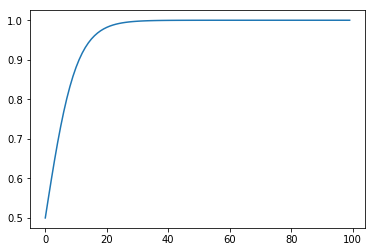

In [203]:
# plot 1 
# stimulus values 
# don't know how to set these
# just following the tutorial 
# the theory behind this is somewhere else and I don't necessary want to go into it because it's psychology
v1 = 0.6
v2 = 0.4

# beta 
betavalues = np.arange(0, 100, 1)

# probability of choosing machine 1
def choiceprob(bv, v1, v2):
    return np.exp(bv*v1)/(np.exp(bv*v1) + np.exp(bv*v2))

# choice probabilities for each value of beta
choiceprobs = np.zeros(100)
for i in range(0, 100):
    choiceprobs[i] = choiceprob(betavalues[i], v1, v2)

# plot 
plt.plot(betavalues, choiceprobs)
plt.show()

As beta increases, the probability of choosing machine 1 increases. I guess at some point it is true that exp(n*0.6) >> exp(n*0.4). We do not need to know the mathematical theory of comparing exponentials at large values. We could just plot. But that's a bad way of doing it I think. damn I should do more advanced maths. 

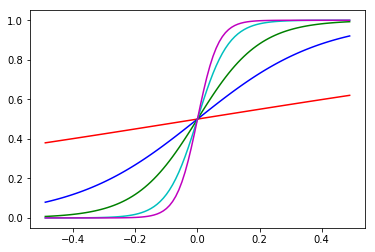

In [207]:
# plot 2 
# stimuli
# there are 1, ..., 99 different pairs of stimuli values whose difference is 0.99, ..., 0.01
# so we have to choose a pair of stimuli values for pairs whose difference < 0.99
# for simplicity we pick a fixed v2 
v2 = 0.5
v1 = np.arange(0.01, 1, 0.01)
diff = np.zeros(99)
for j in range(0, 99):
    diff[j] = v1[j] - v2

# choice probabilities
def choiceprobsdiff(bv):
    cpd = np.zeros(99)
    for i in range(0, 99):
        cpd[i] = choiceprob(bv, v1[i], v2)
    return cpd 

# plot for several values of beta 
plt.plot(diff, choiceprobsdiff(1), 'r-', diff, choiceprobsdiff(5), 'b-', diff, choiceprobsdiff(10), 'g-', diff, choiceprobsdiff(20), 'c-', diff, choiceprobsdiff(30), 'm-')
plt.show()

So the larger the value of beta, the closer to a zig zag the choice probability curve is w.r.t. difference in stimulus values. So the larger the value of beta, the closer to the model in which the choice of the next machine is the machine that gave the higher stimulus value in the previous trial the individual is. 

#### Hyperparameter Optimisation

Can we set the values of alpha and beta so that we get the optimal performance of the model in this game? There are many ways to achieve this. One of which is called Grid Search.

We run model over all possible parameter settings to find out which one gives the maximal probability of feedback probabilities = choice probabilities of model i.e. we find the maximum likelihood estimator alpha and beta.

This is the parameter setting that gives the best performance using this model. 

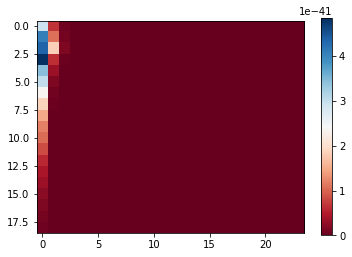

[ 0.2  0.6]
[4.0, 1.0]


In [45]:
# Grid Search for model that gives optimal performance 
# instead of adding up the log likelihoods of getting the choices in the given data, 
# we add up log likelihoods of choosing the right machines based on data.prep.feedback 
            
def Likelihoodopt(alpha, beta): 
    c, cp, loglik, loglikopt = Simulate(alpha, beta)
    likopt = np.exp(loglikopt)
    return likopt

parama = np.arange(0, 1, 0.05)
paramb = np.arange(0, 15, 0.6)

Likopt = []

for alpha in parama:
    for beta in paramb:
        Likopt = np.append(Likopt, Likelihoodopt(alpha, beta))
        
# plot likelihoods
from pylab import cm,imshow,colorbar,axis,show
# could just plot this but would include all cases in which alpha = 0 and beta = 0, which are silly cases
Likopt = Likopt.reshape((20, 25))
# here we delete silly cases
Likoptnonzero = []
for i in range(1, 20):
    for j in range(1, 25):
        Likoptnonzero = np.append(Likoptnonzero, Likopt[i ,j])
Likoptnonzero = Likoptnonzero.reshape(19, 24)
im = imshow(Likoptnonzero, cmap=cm.RdBu)
colorbar(im)
show()         

# find maxima
mleopt = np.zeros(2)
for a in list(range(0, len(parama))): 
        for b in list(range(0, len(paramb))):
            if Likopt[a, b] == np.amax(Likopt):
                mleopt[0] = a*0.05
                mleopt[1] = b*0.6  
print(mleopt)
print([mleopt[0]/0.05, mleopt[1]/0.6])
# this is sometimes not an integer - why?
# probably because the alphas and betas are not stored exactly
# if more than 52 decimal places are required, then it'll be an approximate value

Let (i, j) be integral coordinates on the grid. Then the likelihood of (i, j) is the likelihood of the i-th value of alpha and the j-th value of beta.  

#### Data Fitting 
We use the Grid Search algorithm again to find the parameter setting such that the likelihood of achieving the choices made by the individual player is maximal: 

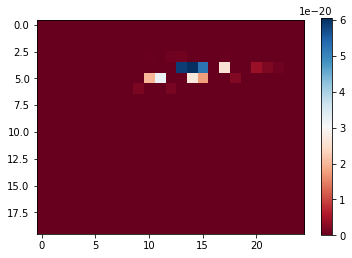

[ 0.2  8.4]
[  4.  14.]


In [46]:
# Data fitting 
# get grid of logliks

def Likelihood(alpha, beta): 
    c, cp, loglik, loglikopt = Simulate(alpha, beta)
    lik = np.exp(loglik)
    return lik

alpha = np.arange(0, 1, 0.05)
beta = np.arange(0, 15, 0.6)

Lik = []

for alpha in parama:
    for beta in paramb:
        Lik = np.append(Lik, Likelihood(alpha, beta))
        
# plot likelihoods
from pylab import cm,imshow,colorbar,axis,show
# could just plot this but would include all cases in which alpha = 0 and beta = 0, which are silly cases
Lik = Lik.reshape((20, 25))
# here we delete silly cases
Liknonzero = []
for i in range(1, 20):
    for j in range(1, 25):
        Liknonzero = np.append(Liknonzero, Lik[i ,j])
Liknonzero = Liknonzero.reshape(19, 24)
im = imshow(Lik, cmap=cm.RdBu)
colorbar(im)
show() 

# maxima  
mle = np.zeros(2)
coords = np.zeros(2)
for a in list(range(0, 20)): 
        for b in list(range(0, 25)):
            if Lik[a, b] == np.amax(Lik):
                mle[0] = a*0.05
                mle[1] = b*0.6
                coords[0] = a
                coords[1] = b
print(mle)
# if the coords of a likelihood is (i, j), then the likelihood is that of the ith value of alpha and the jth value of beta
print(coords)

1. Why does the mle change everytime? 
<br>
Because everytime the model runs, the first choice generated only has a 0.5 probability of being the same as the one before. Then the stimulus for the first trial might change, and if so so would the choice probability, and so on and so forth. Since loglik is the sum of all logs of choice probabilities, it would also be different from before.
2. Why are a and b sometimes not integers? 
<br>
In the cases where the corresponding alpha and beta values are infinite decimals, only finitely many decimals are stored.  

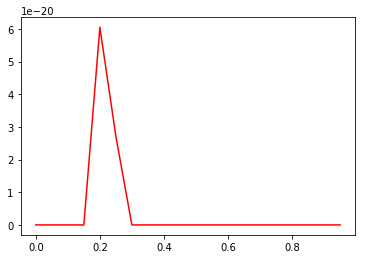

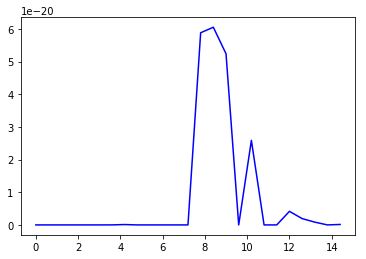

In [47]:
# marginal distributions 
# computation: 
# md for alpha
tmpa= np.sum(Lik, axis = 0)
# md for beta 
tmpb = np.sum(Lik, axis = 1)
# normalisation constant for alpha
na = np.sum(tmpa)
# for b 
nb = np.sum(tmpb)
# mda 
mda = np.divide(tmpa, na)
# mdb 
mdb = np.divide(tmpb, nb)

# slice the landscape
# choose values for alpha and beta to slice the landscape along
# for instance the maximum likelihood estimators 
# numpy.astype needed because values were previously stored as floating points
a = coords[0].astype(int) 
b = coords[1].astype(int)
plt.plot(parama, Lik[:, b], 'r-')
plt.show() 
plt.plot(paramb, Lik[a, :], 'b-')
plt.show()

### Bayesian Learning
Rough Learning Algorithm: 
1. Let q be the probability that machine 0 gives a coin
2. Set an initial probability distribution for q. We use the uniform distribution over the discretised interval [0, 1]. 
3. Get outcome of trial 1: 
<br> if machine 1 gives a coin, then the likelihood of q is q 
<br> else the likelihood is 1-q
4. Use Bayes theorem to get the posterior distribution 
5. At this point the model uses this distribution as the prior for trial 2 with probability 1-H, and the uniform distribution with probability H. H is called the transition probability. 
6. After obtaining the new prior, repeat all steps until last trial.

In [67]:
# Bayesian Learning

H = 1/25 # as per the tutorial - do not know what a good way to decide this is

q = np.arange(0.01, 0.99, 0.01)
def Bayes(H):
    
# Let q be the probability that machine 0 gives a coin 
    q = np.arange(0.01, 0.99, 0.01)

# the prior distribution is uniform 
    prior = np.zeros((135, len(q)))
    prior[0] = (1/len(q))*np.ones(len(q))
    post = np.zeros((134, len(q)))
# p[i] is the prob distr for q for trial[i]  

    for i in range(0, 134):
        if r[i, 0] == 1: 
            post[i] = np.multiply(q, prior[i])/np.sum(np.multiply(q, prior[i])) # normalised posterior
        else:
            post[i] = np.multiply(1-q, prior[i])/np.sum(np.multiply(1-q, prior[i]))

# now for the prior for trial i + 1 
        prior[i+1] = (1-H)*post[i] + H*np.ones(len(q))/(len(q))
    return prior

Bayes(H)

array([[ 0.01020408,  0.01020408,  0.01020408, ...,  0.01020408,
         0.01020408,  0.01020408],
       [ 0.01961204,  0.01941806,  0.01922409, ...,  0.00118408,
         0.0009901 ,  0.00079612],
       [ 0.02877299,  0.02820876,  0.0276502 , ...,  0.00047736,
         0.00045156,  0.00043142],
       ..., 
       [ 0.00389284,  0.0039744 ,  0.00408266, ...,  0.00043546,
         0.00042818,  0.00042123],
       [ 0.00051433,  0.00062495,  0.0007422 , ...,  0.00154831,
         0.00154091,  0.00153402],
       [ 0.00042009,  0.00043715,  0.00045981, ...,  0.00385561,
         0.00387488,  0.00389497]])

In [68]:
# Expected value of q using priors for trial i
eq = np.zeros(135)
for i in list(range(0, 135)): 
    eq[i] = np.sum(np.multiply(Bayes(H)[i], q))
eq

array([ 0.495     ,  0.34287327,  0.26585845,  0.42575462,  0.34878358,
        0.45789035,  0.54172294,  0.60785283,  0.66071255,  0.5583053 ,
        0.48309361,  0.55148633,  0.48919514,  0.43616565,  0.5033043 ,
        0.45323143,  0.50838161,  0.55320712,  0.49727929,  0.45292122,
        0.41154255,  0.47703792,  0.52419411,  0.47344946,  0.4350784 ,
        0.48713115,  0.44768239,  0.41403849,  0.46789656,  0.51222474,
        0.55658351,  0.49309736,  0.5350692 ,  0.57386884,  0.61313314,
        0.65245362,  0.56315704,  0.50175753,  0.44665391,  0.39152769,
        0.48722284,  0.44036508,  0.39737975,  0.35497483,  0.31414468,
        0.41903301,  0.37314667,  0.33681904,  0.30419712,  0.27486295,
        0.24902257,  0.35578099,  0.30998123,  0.28120031,  0.37035674,
        0.45846868,  0.38685508,  0.34904294,  0.32101458,  0.29726738,
        0.37377754,  0.33551751,  0.40325694,  0.36074352,  0.33400473,
        0.31225672,  0.29290492,  0.36349163,  0.44000095,  0.52

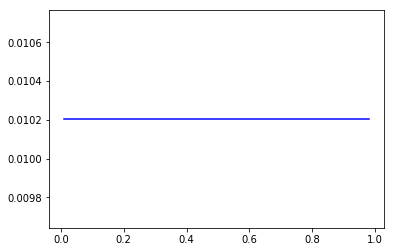

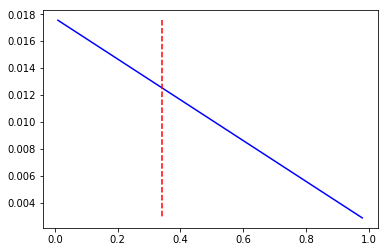

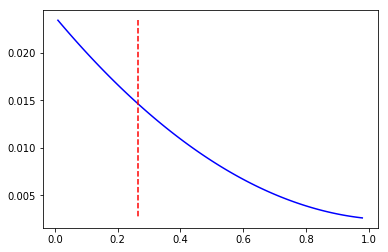

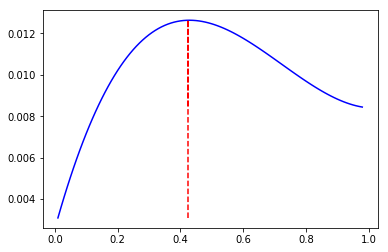

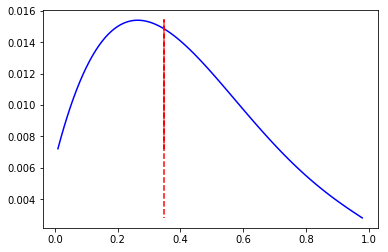

In [69]:
# Plot prior distributions for each trial together with the expected value of q
# We expect these to be polynomials in q of increasing degree

H = 0.25
eqplt = np.zeros((len(eq), len(q)))
for k in list(range(0, 135)):
    eqplt[k, :] = eq[k]*np.ones(len(q))
    
for i in range(0, 5):
    plt.plot(q, Bayes(H)[i], 'b-', eqplt[i], Bayes(H)[i], 'r--')
    plt.show()

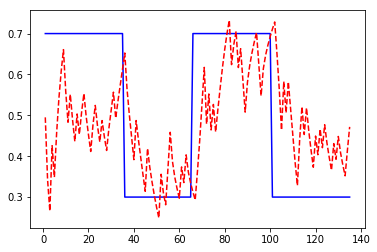

In [70]:
# plot of true feedback probabilities together with expected values of q over all trials for a chosen value of H 
plt.plot(trials, probblue, 'b-', trials, eq, 'r--')
plt.show()

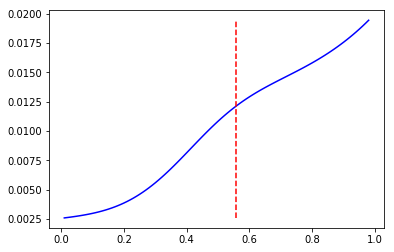

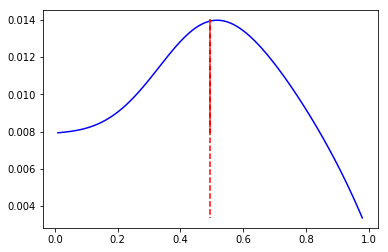

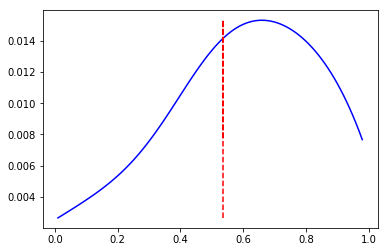

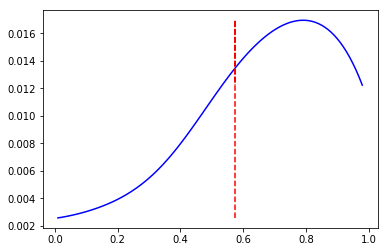

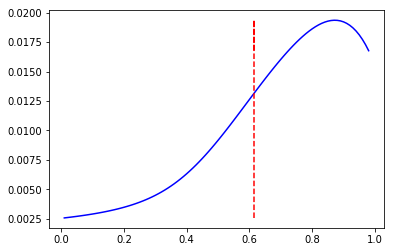

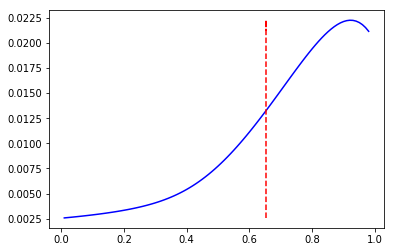

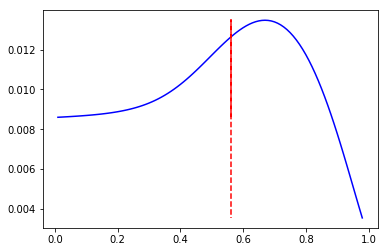

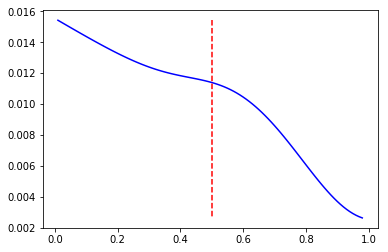

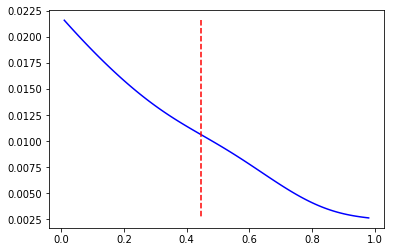

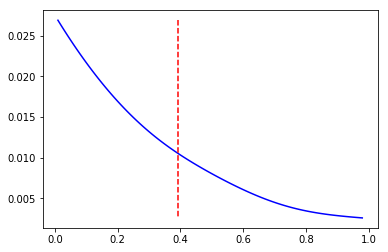

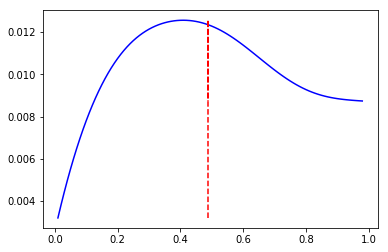

In [71]:
# identify a point of reversal  
# choose a few trials around that point to plot to see how priors and estimated q changes
a = list(range(30, 41, 1))
# plot prior probs against q for those trials
for i in range(30, 41):
    plt.plot(q, Bayes(H)[i], 'b-', eqplt[i], Bayes(H)[i], 'r--')
    plt.show()

Note:

One reason why the tutorial chooses the interval sizes to be 0.01 is because nobody cares about the 3rd decimal point and beyond. 